# 1. Cargar datos

In [70]:
import pandas as pd

In [71]:
df = pd.read_csv('https://raw.githubusercontent.com/jsulopz/data/main/uso_internet_espana.csv')
df.sample(10)

,Unnamed: 0,uso_internet,sexo,edad,estudios
1323,1337,1,Hombre,50,Superiores
1584,1599,1,Mujer,45,Medios universitarios
2224,2245,1,Hombre,33,Secundaria
1703,1719,1,Mujer,21,Primaria
1971,1989,1,Hombre,32,Superiores
2039,2057,0,Mujer,58,Primaria
1119,1128,0,Hombre,68,Primaria
350,353,1,Mujer,26,Primaria
1247,1259,0,Mujer,66,Medios universitarios
2244,2265,1,Mujer,49,Primaria


In [72]:
df = df.drop(columns='Unnamed: 0')
df = pd.get_dummies(data = df, drop_first=True, dtype=int)
df

,uso_internet,edad,sexo_Mujer,estudios_Medios universitarios,estudios_Primaria,estudios_Secundaria,estudios_Sin estudios,estudios_Superiores
0,0,66,1,0,1,0,0,0
1,1,72,0,0,1,0,0,0
2,1,48,0,1,0,0,0,0
3,0,59,0,0,0,0,0,1
4,1,44,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...
2450,1,43,0,0,1,0,0,0
2451,1,18,1,0,0,1,0,0
2452,0,54,1,0,1,0,0,0
2453,1,31,0,0,0,1,0,0


# 2. Selección de variables

In [73]:
explicativas =  df.drop(columns='uso_internet')
objetivo = df.uso_internet


# 3. Entrenar Modelo DecisionTreeClassifier()

In [74]:
from sklearn.tree import DecisionTreeClassifier

In [75]:
model = DecisionTreeClassifier(max_depth=3)
model.fit(X=explicativas, y=objetivo)

DecisionTreeClassifier(max_depth=3)

# 4. Visualizar modelo

In [78]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

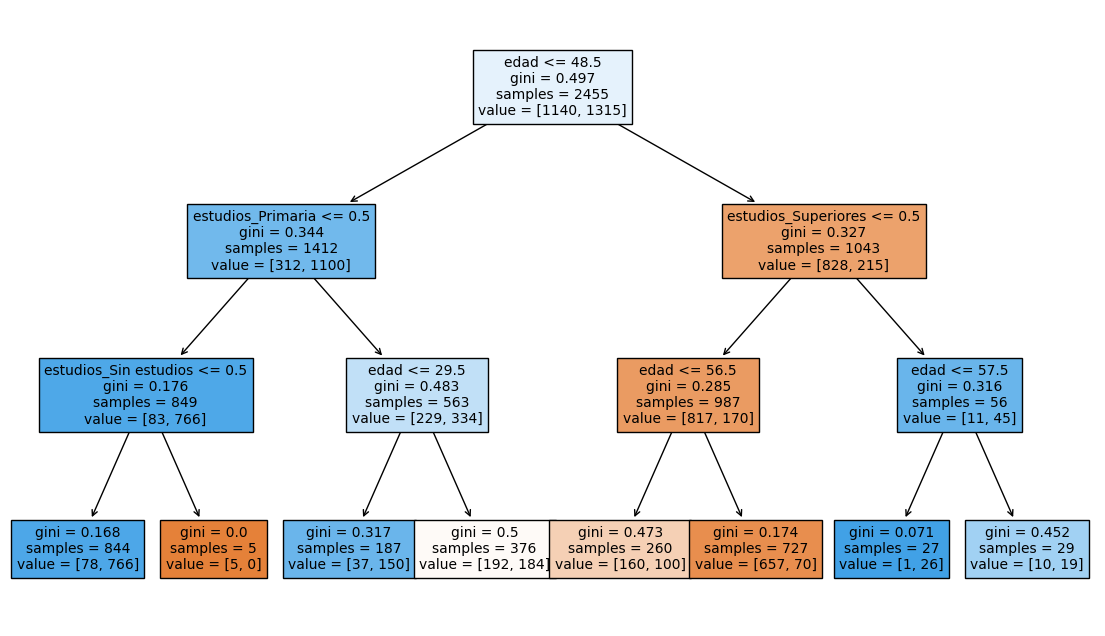

In [80]:
#Falso va para la derecha
plt.figure(figsize=(14,8))
plot_tree(decision_tree=model, feature_names=explicativas.columns, filled=True, fontsize=10);

In [122]:
# Samples coincidencias, y=usaron internet
#Numero total de personas
size = len(df)

# 5. Calcular predicción

In [82]:
a = explicativas.sample()
a

,edad,sexo_Mujer,estudios_Medios universitarios,estudios_Primaria,estudios_Secundaria,estudios_Sin estudios,estudios_Superiores
399,41,1,0,1,0,0,0


In [90]:
184/376

0.48936170212765956

In [93]:
result = model.predict_proba(a)

In [102]:
print("La probalidad de que si usa internet es", result[0,1]*100)

La probalidad de que si usa internet es 48.93617021276596


In [113]:
y_pred = model.predict(explicativas)

# 7. Interpretar modelo

In [105]:
import seaborn as sns

<Axes: xlabel='edad', ylabel='Count'>

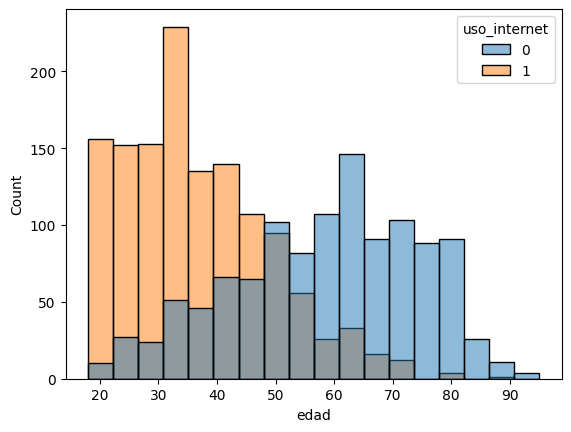

In [111]:
sns.histplot(x=df.edad, hue=df.uso_internet)

# 8 ¿Que tan bueno es el modelo?

In [114]:
df['pred'] = y_pred

In [116]:
df.sample(10)[['uso_internet', 'pred']]

,uso_internet,pred
2071,1,1
763,0,0
2256,1,1
744,1,1
0,0,0
1557,0,0
1547,1,0
247,1,1
443,1,1
1912,1,0


In [124]:
(((df['uso_internet'] == df['pred']).sum() )/ size) * 100

80.44806517311609